# Introduction
* One of the biggest challenges that any company faces today is to retain their customers, whether it be gaming, banking, telecom or any other industry. Retaining your customers is a challenging task.

* In this project we will try to understand customer behavior and attributes that might be useful in identifying the useful characteristics of the churners.

### Steps to be followed:
* Business insight understanding
* Perform EDA to get some insights on the data
* Build a model based on these insights
* Deploy the model

### Types of churn scenarios in telecom domain:
* Tariff plan churn (1000 p/m -to-> 200 p/m)
* Service churn     (yearly -to-> monthly subscription)
* Product churn     (postpaid -to-> prepaid)
* Usage churn       (Inactive or Zero usage)
* Subscriber churn  (Port out to competition)

### Types of churners
* Conditionally loyal
* Conditional churner
* Unsatisfied churner
* Lifestyle Migrator

### Types of Subscribers
* Inert Subscribers
* Unconditionally loyal Subscribers
* Locked-in Subscribers

## EDA 

### Step 1: Univariate analysis
* Analyzing a single independent variable (x) along with churn (dependent variable, y)
* Analyzing each categorical variable and seeing the distribution

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt


In [3]:
telco_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.shape

(7043, 21)

In [5]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telco_data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

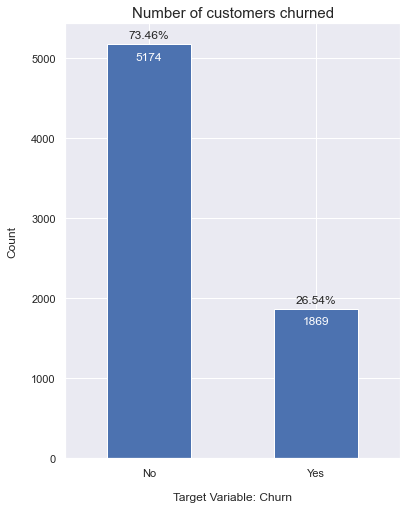

In [8]:
sns.set()
telco_data.Churn.value_counts().plot(kind = 'bar', figsize = (6, 8))
plt.ylabel("Count", labelpad = 14)
plt.xlabel("Target Variable: Churn", labelpad = 14)
plt.title("Number of customers churned", fontsize = 15)
plt.xticks(rotation = 'horizontal')

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i][1] + 70, str(y[i][0]) + '%', ha = 'center')
        plt.text(i, y[i][1] - 200, str(y[i][1]), ha = 'center', c = 'white')
        
y_perc = round(telco_data.Churn.value_counts()*100/len(telco_data), 2)
y_loc = telco_data.Churn.value_counts()
x = ['Yes', 'No']
y = [[y_perc[0], y_loc[0]], [y_perc[1], y_loc[1]]]

add_labels(x, y)

In [9]:
# Are there any null values?
telco_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning 

In [10]:
# Copying base data for preprocessing
telco_data2 = telco_data.copy()
# Converting type of TotalCharges column from object to numeric

telco_data2.TotalCharges = pd.to_numeric(telco_data2.TotalCharges, errors = 'coerce')
telco_data2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Let us check these missing records
telco_data2[telco_data2['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# Since the proportion of these na data is less, it is better to simply drop it
telco_data2.dropna(how = 'any', inplace = True)

### Binning 
we divide customers based on their 'tenure' (in months) into bins of 12, 24, ...

In [13]:
telco_data2.tenure.max()

72

In [14]:
labels = [f'{i}-{i+11}' for i in range(1, 72, 12)]
telco_data2['tenure_group'] = pd.cut(telco_data2.tenure, range(1, 80, 12), right = False, labels = labels)

In [15]:
telco_data2['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [16]:
# Removing the columns not required: cistomerID, tenure
telco_data2.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)
telco_data2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Data Exploration:

1) **Univariate Analysis:** Distribution of each individual predictors (categorical) by churn

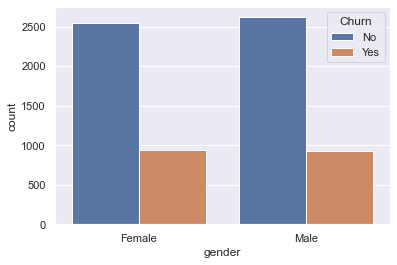

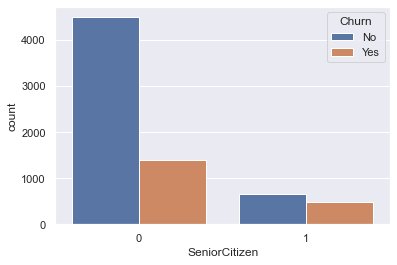

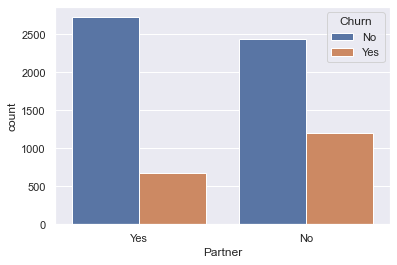

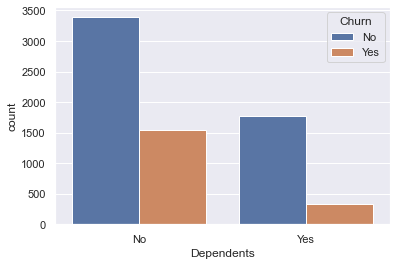

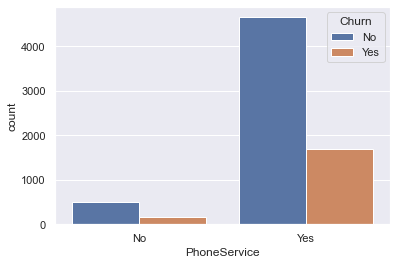

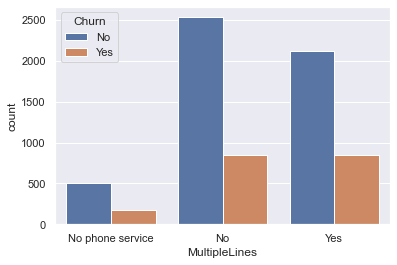

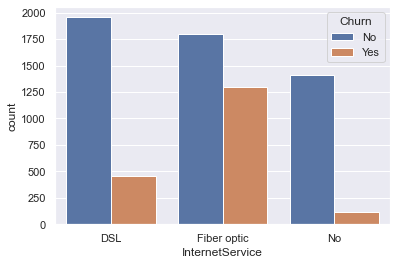

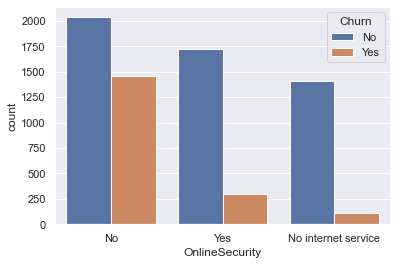

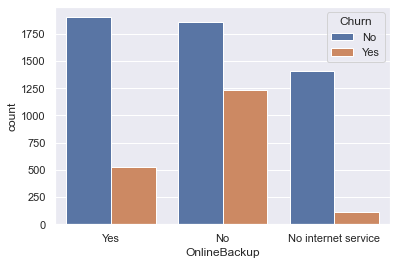

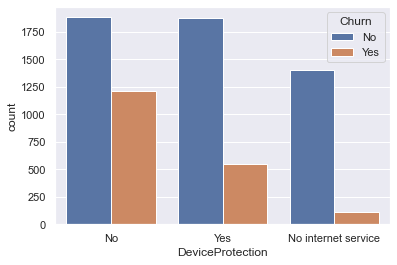

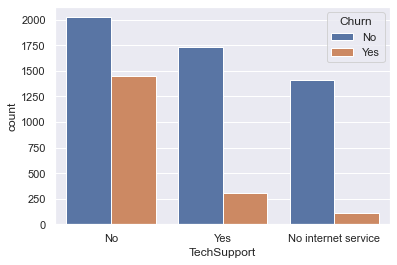

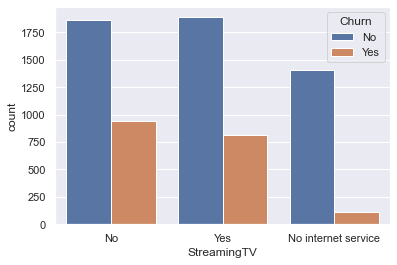

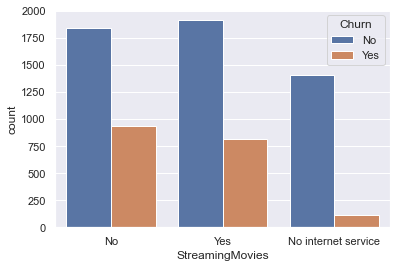

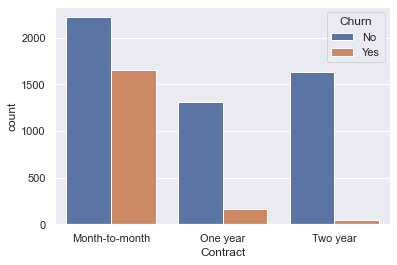

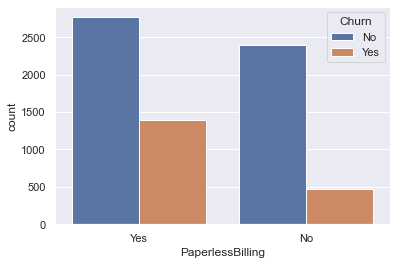

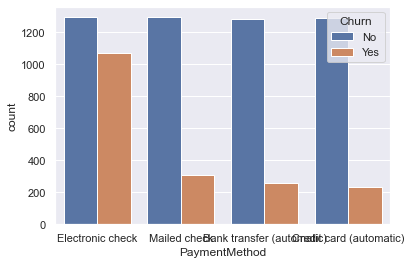

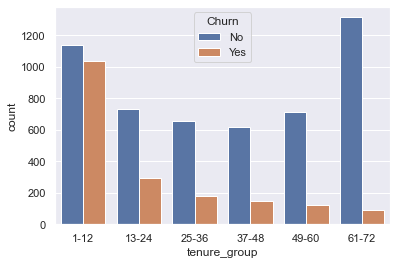

In [17]:
for i, predictor in enumerate(telco_data2.drop(['MonthlyCharges', 'TotalCharges', 'Churn'], axis = 1)):
    plt.figure(i)
    sns.countplot(data = telco_data2, x = predictor, hue = 'Churn')

In [18]:
# Converting target variable (Churn) to a binary numeric variable
telco_data2['Churn'] = np.where(telco_data2.Churn == 'Yes', 1, 0)

In [19]:
# One hot encoding all categorical variables 
telco_data_dummies = pd.get_dummies(telco_data2, drop_first=  True)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


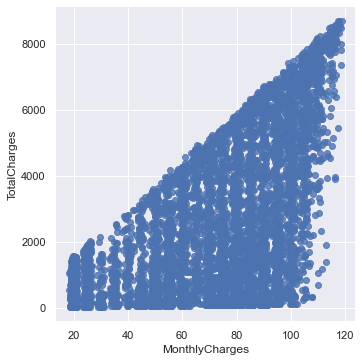

In [20]:
# Relation between monthly charges and totalcharges
sns.lmplot(data = telco_data_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False)

Total charges increase as monthly charges increase as expected 

### Churn by monthly charges 

Text(0.5, 1.0, 'Monthly charges by churn')

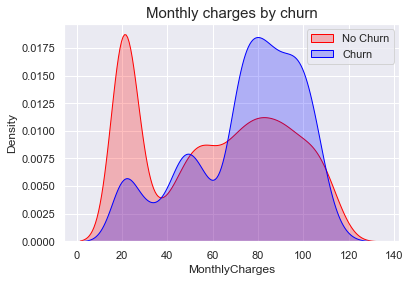

In [21]:
mth = sns.kdeplot(telco_data_dummies['MonthlyCharges'][telco_data_dummies['Churn'] == 0],
             color = 'red', shade = True)
mth = sns.kdeplot(telco_data_dummies['MonthlyCharges'][telco_data_dummies['Churn'] == 1],
             color = 'blue', shade = True)

plt.legend(['No Churn', 'Churn'], loc = 'upper right')
plt.title("Monthly charges by churn", fontsize = 15)

**Insight:** Churn is high when monthly charges are high 


### Churn by total charges 

Text(0.5, 1.0, 'Total charges by churn')

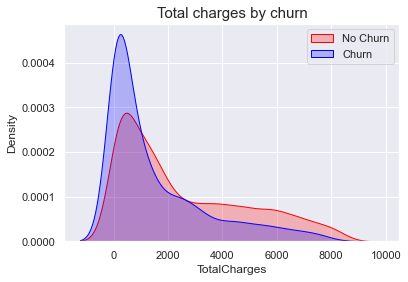

In [22]:
tot = sns.kdeplot(telco_data_dummies['TotalCharges'][telco_data_dummies['Churn'] == 0],
             color = 'red', shade = True)
tot = sns.kdeplot(telco_data_dummies['TotalCharges'][telco_data_dummies['Churn'] == 1],
             color = 'blue', shade = True)

plt.legend(['No Churn', 'Churn'], loc = 'upper right')
plt.title("Total charges by churn", fontsize = 15)

**Surprising insight** as above density plot shows higher Churn at lower Total Charges.

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture becomes clearer :- 
* Higher Monthly Charge at lower tenure results into lower Total Charge. 
* Hence, all these 3 factors viz. Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

### Correlation of all predictors woth churn 

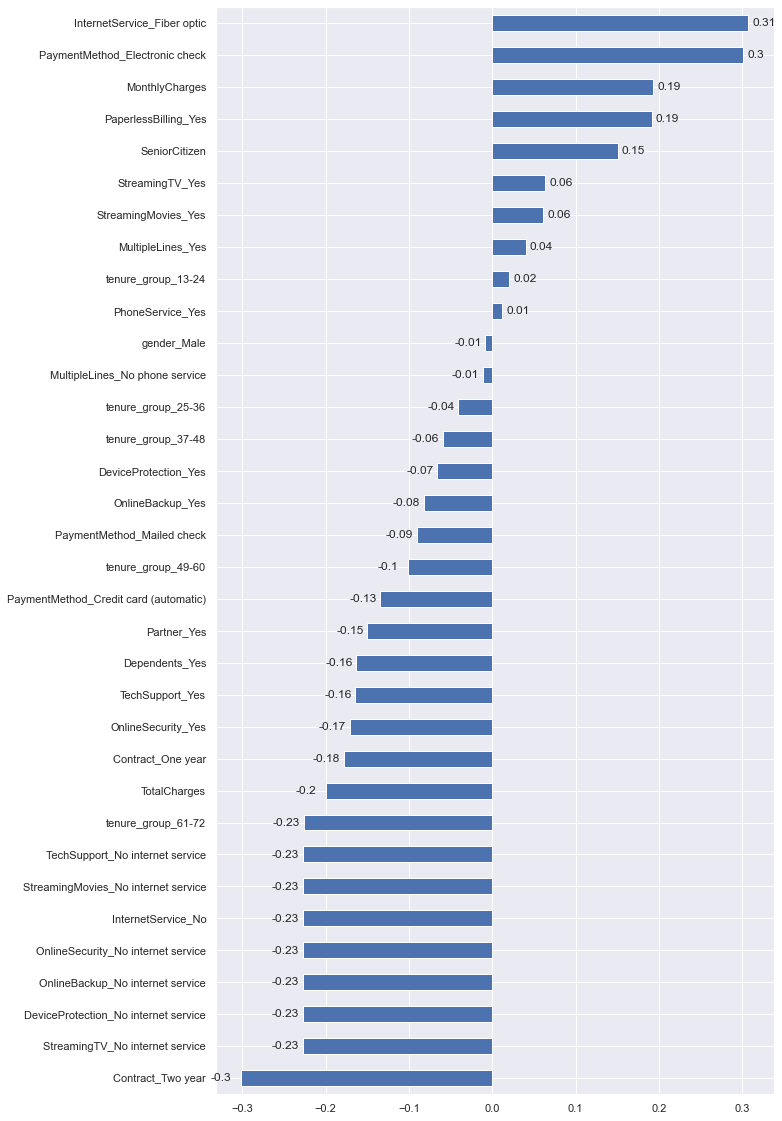

In [33]:
plt.figure(figsize = (10, 20))
telco_data_dummies.corr()['Churn'].sort_values(ascending = True)[:-1].plot(kind = 'barh')

def add_labels(x, y):
    for i in range(len(y)):
        plt.text(x_loc[i], i, round(x[i], 2), va = 'center')
        
x = telco_data_dummies.corr()['Churn'].sort_values(ascending = True)[:-1].values
x_loc = [c + 0.005 if c > 0 else c - 0.037 for c in x]
y = list(telco_data_dummies.columns)
y.remove('Churn')

add_labels(x, y)

**High churn rate seen for:**
1) Month to month contracts

2) No online security

3) No tech support

4) First year subscription

5) Fiber optics internet

**Lower churn rate seen for:**
1) Long term contracts

2) Subscription without internet service

3) Customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and Number of multiple lines have **almost No impact on Churn.**

## Bivariate Analysis

In [34]:
telco_target0 = telco_data2.loc[telco_data2['Churn'] == 0]
telco_target1 = telco_data2[telco_data2['Churn'] == 1]

In [35]:
def uniplot(df, col, title, hue = None):
    sns.set_style('darkgrid')
    sns.set_context('talk', font_scale = 1.25)
    
    plt.rcParams["axes.titlepad"] = 20
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue=hue, palette = 'bright')
    plt.show()


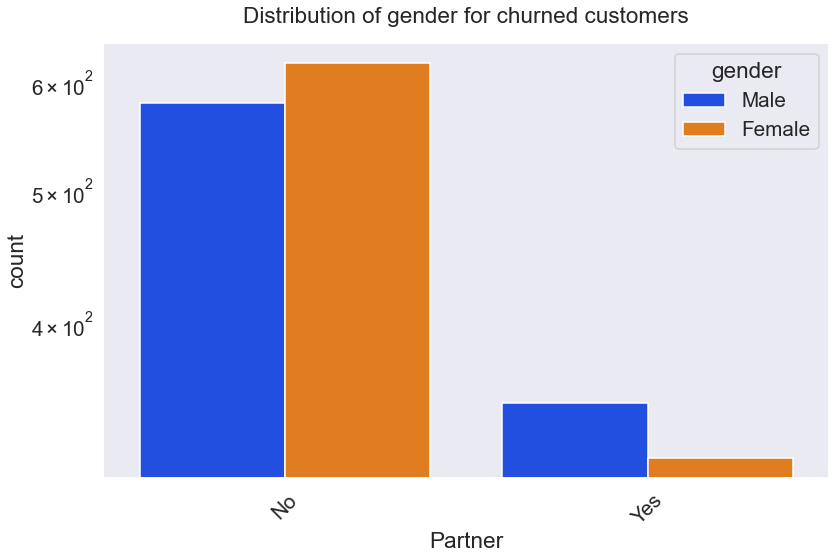

In [36]:
uniplot(telco_target1, 'Partner', title = "Distribution of gender for churned customers", hue = 'gender')

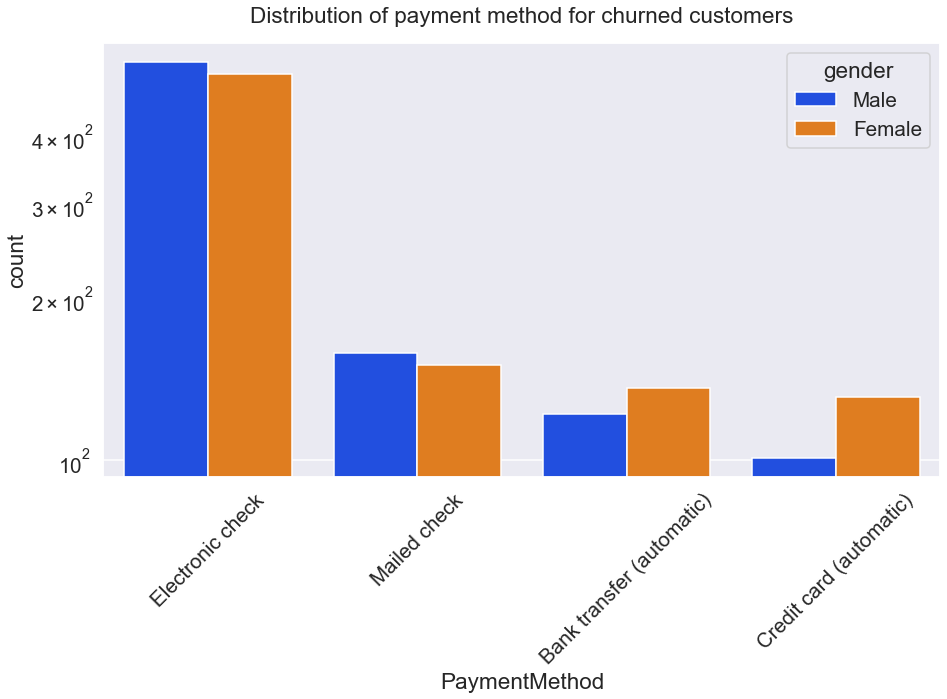

In [37]:
uniplot(telco_target1, 'PaymentMethod', title = "Distribution of payment method for churned customers", hue = 'gender')

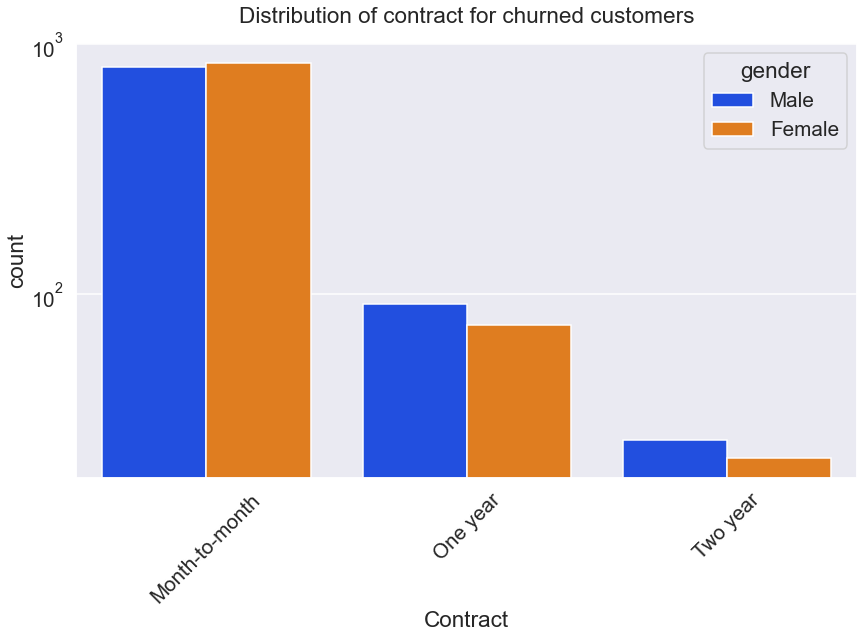

In [38]:
uniplot(telco_target1, 'Contract', title = "Distribution of contract for churned customers", hue = 'gender')

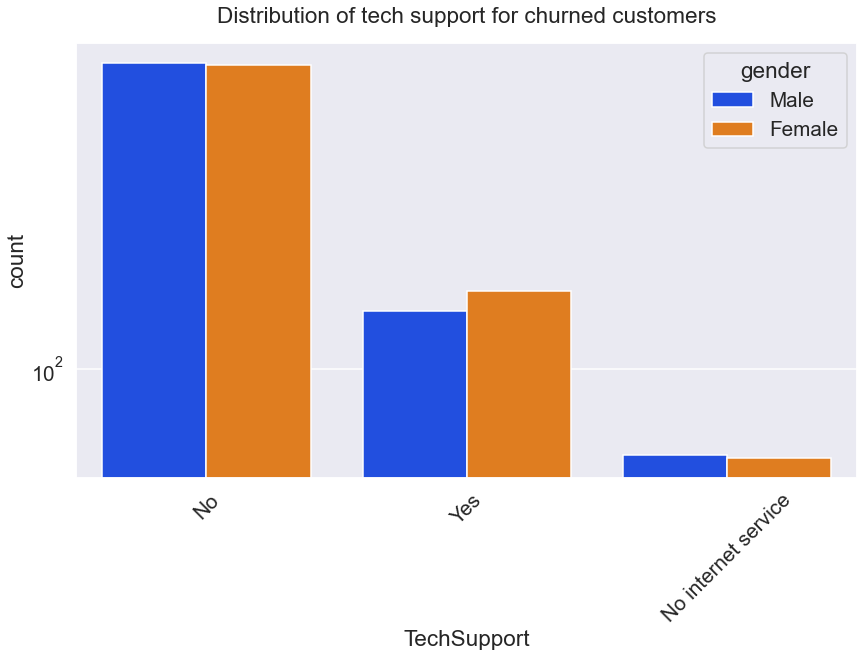

In [39]:
uniplot(telco_target1, 'TechSupport', title = "Distribution of tech support for churned customers", hue = 'gender')

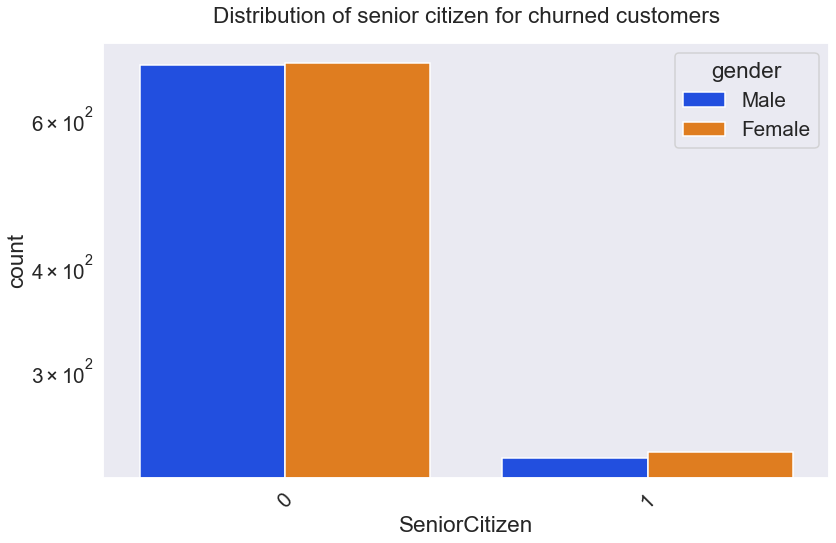

In [40]:
uniplot(telco_target1, 'SeniorCitizen', title = "Distribution of senior citizen for churned customers", hue = 'gender')

# Conclusions:

1) Electronic check mediums are the highest churners

2) Monthly paying customers are more likely to churn (free to go customers)

3) Clients with `no online security` OR `no tech support` are more likely to churn

4) Non senior citizens are high churners (because of more familiarity with tech, possibly)

In [41]:
# saving one hot encoded dataframe as csv
telco_data_dummies.to_csv('telco_data_dummies.csv')

In [42]:
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
